In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
data['class'].describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [7]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:>

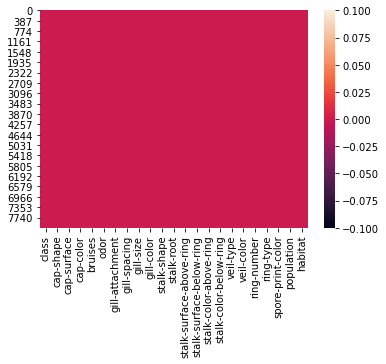

In [8]:
sns.heatmap(data.isna())

In [9]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
for i in data.columns:
    print(i, ':\n', data[i].unique(), '\n')

class :
 ['p' 'e'] 

cap-shape :
 ['x' 'b' 's' 'f' 'k' 'c'] 

cap-surface :
 ['s' 'y' 'f' 'g'] 

cap-color :
 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] 

bruises :
 ['t' 'f'] 

odor :
 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] 

gill-attachment :
 ['f' 'a'] 

gill-spacing :
 ['c' 'w'] 

gill-size :
 ['n' 'b'] 

gill-color :
 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] 

stalk-shape :
 ['e' 't'] 

stalk-root :
 ['e' 'c' 'b' 'r' '?'] 

stalk-surface-above-ring :
 ['s' 'f' 'k' 'y'] 

stalk-surface-below-ring :
 ['s' 'f' 'y' 'k'] 

stalk-color-above-ring :
 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y'] 

stalk-color-below-ring :
 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c'] 

veil-type :
 ['p'] 

veil-color :
 ['w' 'n' 'o' 'y'] 

ring-number :
 ['o' 't' 'n'] 

ring-type :
 ['p' 'e' 'l' 'f' 'n'] 

spore-print-color :
 ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b'] 

population :
 ['s' 'n' 'a' 'v' 'y' 'c'] 

habitat :
 ['u' 'g' 'm' 'd' 'p' 'w' 'l'] 



In [11]:
labelenc = LabelEncoder()

In [12]:
for i in data.columns:
    data[i] = labelenc.fit_transform(data[i])
    
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
data_corr = data.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

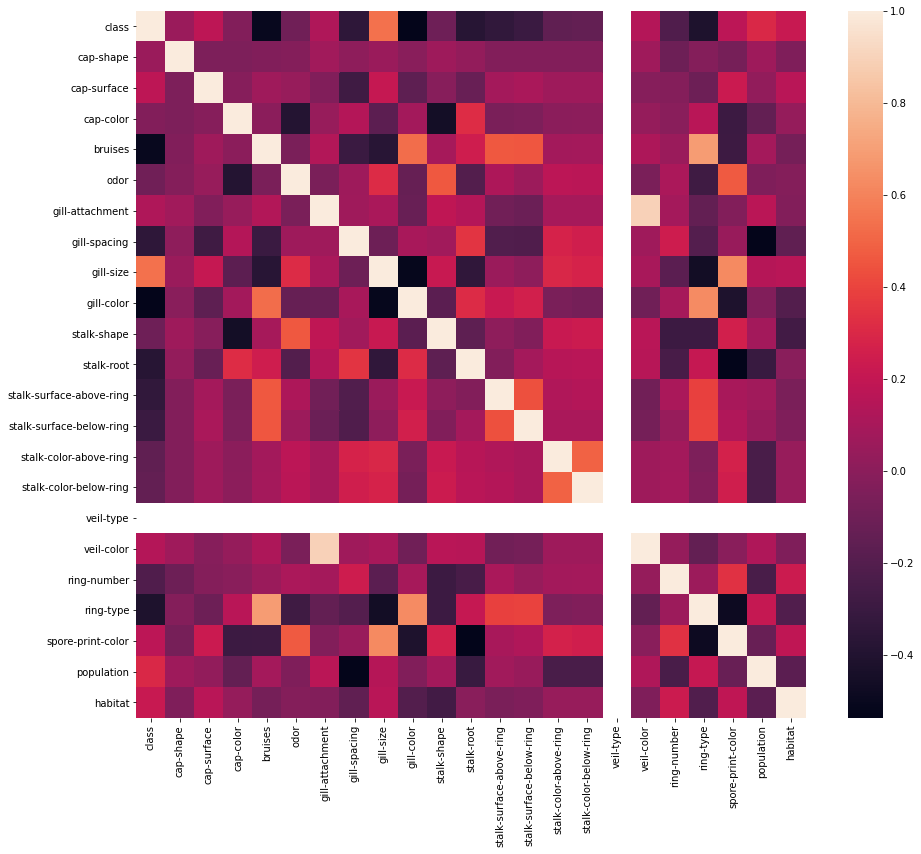

In [14]:
plt.figure(figsize = (15,13))
sns.heatmap(data.corr())

plt.show

In [15]:
data.drop('veil-type', axis = 1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

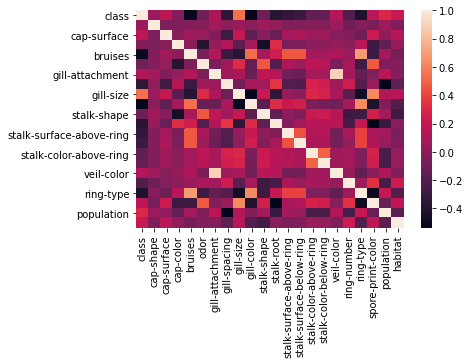

In [16]:
sns.heatmap(data.corr())
plt.show

In [17]:
for i in data.columns:
    print(i, data[i].value_counts())

class 0    4208
1    3916
Name: class, dtype: int64
cap-shape 5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64
cap-surface 3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64
cap-color 4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
6      16
7      16
Name: cap-color, dtype: int64
bruises 0    4748
1    3376
Name: bruises, dtype: int64
odor 5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: odor, dtype: int64
gill-attachment 1    7914
0     210
Name: gill-attachment, dtype: int64
gill-spacing 0    6812
1    1312
Name: gill-spacing, dtype: int64
gill-size 0    5612
1    2512
Name: gill-size, dtype: int64
gill-color 0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64
stalk-shape 1    4608
0    3516
Name: stalk-shape, dtype: int64
stalk-root 1

In [18]:
X = data.drop(columns = 'class')
y = data['class']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.22, random_state=53)

# logisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [24]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [25]:
pred_log = log_reg.predict(x_test)

In [26]:
accuracy_score(y_test,pred_log)

0.95917225950783

# DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier 

dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
dt.score(x_train,y_train) 

1.0

In [29]:
pred_dt = dt.predict(x_test)

In [30]:
confusion_matrix(y_test,pred_dt)

array([[954,   0],
       [  0, 834]])

# HyperParameterOptimization

In [31]:
grid_param = {'criterion':['gini','entropy'],
          'max_depth':range(2,10,2),
          'min_samples_leaf':range(2,10,2),
          'min_samples_split':range(2,10,2)}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid_search = GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [34]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [35]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [36]:
dt_c = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf= 2,min_samples_split= 2)

In [37]:
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

1.0

In [38]:
y_pred = dt.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

1.0

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



# Knn-Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn1 = KNeighborsClassifier()

knn1.fit(x_train,y_train) 
y1_pred = knn1.predict(x_test)

In [43]:
knn1.score(x_test,y_test)

1.0

In [44]:
accuracy_score(y_test,y1_pred)

1.0

In [45]:
grid_param_knn={'algorithm': ['kd_tree', 'brute'],'leaf_size': [12,14,18],'n_neighbors': [2, 3, 6, 10]}

gridsearch_knn=GridSearchCV(estimator=knn1,param_grid=grid_param_knn)

In [46]:
gridsearch_knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [12, 14, 18],
                         'n_neighbors': [2, 3, 6, 10]})

In [47]:
gridsearch_knn.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 12, 'n_neighbors': 3}

In [48]:
knn1 = KNeighborsClassifier(algorithm='kd_tree',leaf_size=12,n_neighbors=3)

In [49]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=12, n_neighbors=3)

In [50]:
y1_pred = knn1.predict(x_test)

In [51]:
conf_mat_knn=confusion_matrix(y_test,y1_pred)
conf_mat_knn

array([[954,   0],
       [  0, 834]])

In [52]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



# RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=85, random_state=33)

In [55]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=85, random_state=33)

In [56]:
rf.score(x_test,y_test)

1.0

In [57]:
y1_pred = rf.predict(x_test)
y1_pred

array([1, 0, 1, ..., 0, 1, 0])

In [58]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



# Saving The Model

In [59]:
import pickle

In [60]:
filename = 'mushroom_model.pickle'
pickle.dump(knn1,open(filename, 'wb'))